# Traitement de signal
## Atelier \#4 : Séries de Fourier
### Support de cours disponible à l'adresse : [https://www.github.com/a-mhamdi/isetbz](https://www.github.com/a-mhamdi/isetbz)

---

Soit le code suivant :

In [1]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})

In [2]:
tot_pts = 1000
t = np.linspace(-2, 7, tot_pts) # Vecteur temps : t
wt = 2*np.pi*t # Fréquence : f = 1Hz

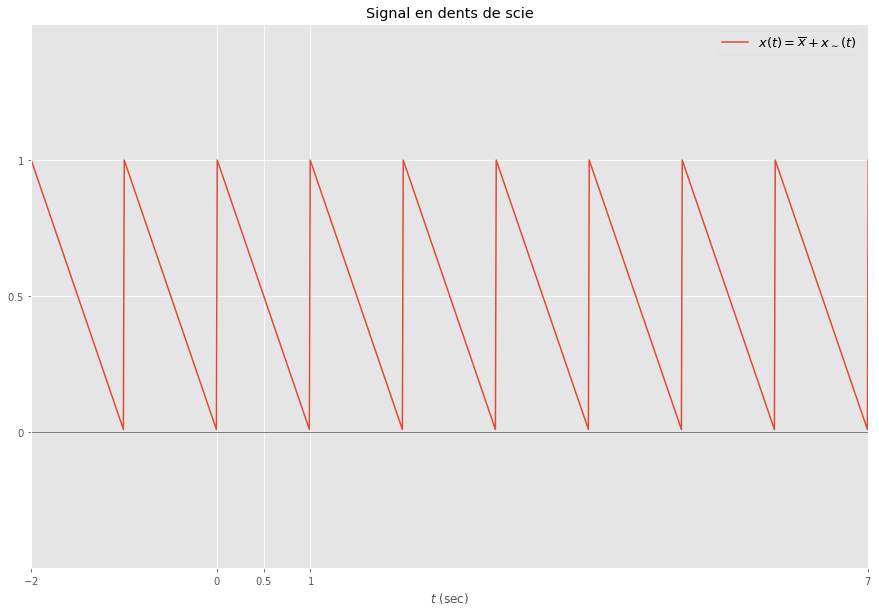

<Figure size 1080x720 with 0 Axes>

In [3]:
plt.axhline(0, color = 'gray', lw = 1)
plt.plot(t, 0.5 + 0.5 * signal.sawtooth(wt, 0), lw = 1.5, label = r'$x(t) = \overline{x} + x_{\sim}(t)$')

plt.yticks([-1, 0, 0.5, 1, 2], ['$-1$', '$0$', '$0.5$', '$1$', '$2$'])
plt.xticks([-2, 0, 0.5, 1, 7], ['$-2$', '$0$', '$0.5$', '$1$', '$7$'])
plt.xlim(-2, 7)
plt.ylim(-0.5, 1.5)

plt.legend(fontsize = 13, fancybox = True, framealpha = 0.3, loc = 'best')
plt.title('Signal en dents de scie')
plt.xlabel('$t$ (sec)')
plt.show()

Rappelons d'abord la définition du signal $x$ :
$$x(t) \;=\; \overline{x} + x_\sim (t)$$
La valeur moyenne du signal est :
$$\overline{x} \;=\; 0.5$$
Il reste maintenant à calculer la partie alternative de $x_\sim$. Par définition, l'expression de $x_\sim$ est donnée par :
$$x_\sim (t) \;=\; \displaystyle\sum_{k=1}^{+\infty}a_k\cos\left(2k\pi\displaystyle\frac{t}{\text{T}}\right)+\displaystyle\sum_{k=1}^{+\infty}b_k\sin\left(2k\pi\displaystyle\frac{t}{\text{T}}\right)$$
Le terme $a_k$ est :
$$a_k \;=\; \displaystyle\frac{2}{\text{T}}\displaystyle\int_{0}^{\text{T}}x(t)\cos\left(2k\pi\displaystyle\frac{t}{\text{T}}\right)dt,\quad\quad\text{avec}\quad \text{T}=1\,\text{sec}.$$
Le signal $x$ est de période $\text{T}$ = 1 sec. Il est de nature impair. Il en résulte que :
$$a_k \;=\; 0,\quad\quad\forall k\,=\,1,\,2,\,\cdots$$
Chaque coefficient $b_k$ se calcule de la façon suivante :
$$b_k \;=\; \displaystyle\frac{2}{\text{T}}\displaystyle\int_{0}^{\text{T}}x(t)\sin\left(2k\pi\displaystyle\frac{t}{\text{T}}\right)dt,\quad\quad\text{avec}\quad \text{T}=1\,\text{sec}.$$
La troncature de $x$ sur une période est :
$$x(t) \;=\; \Gamma(t)-r(t)$$
L'équation de $b_k$ se transforme ainsi en 
$$b_k \;=\; \displaystyle\frac{2}{\text{T}}\displaystyle\int_{0}^{\text{T}}\left(\Gamma(t)-r(t)\right)\sin\left(2k\pi\displaystyle\frac{t}{\text{T}}\right)dt,\quad\quad\text{avec}\quad \text{T}=1\,\text{sec}.$$
Soit encore
$$b_k \;=\; -\displaystyle\frac{2}{\text{T}}\displaystyle\int_{0}^{\text{T}}t\sin\left(2k\pi\displaystyle\frac{t}{\text{T}}\right)dt$$
Après intégration, on obtient :
$$b_k \;=\; \displaystyle\frac{1}{k\pi}\displaystyle\left[t\cos\left(2k\pi\displaystyle\frac{t}{\text{T}}\right)\right]_{0}^{\text{T}}$$
Finallement : 
$$b_k \;=\; \displaystyle\frac{1}{k\pi}$$
Compte tenu de ce qui précède, l'expression finale de $x$ est
$$x(t) \;=\; 0.5 + \displaystyle\frac{1}{\pi}\displaystyle\sum_{k=1}^{+\infty}\frac{\sin\left(2k\pi\displaystyle\frac{t}{\text{T}}\right)}{k}$$

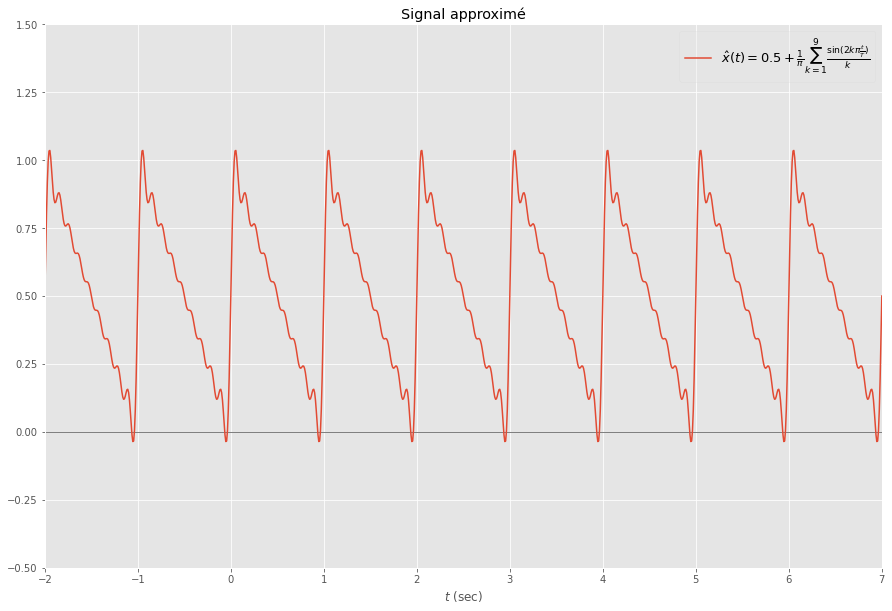

<Figure size 1080x720 with 0 Axes>

In [4]:
plt.axhline(0, color = 'gray', lw = 1)
# Itérer sur une liste
x_lst = [1/(k*np.pi) * np.sin(k * wt) for k in range(1, 10)]
# Convertir en np
x_np = np.asarray(x_lst, dtype = np.float32)
# Transformer le vecteur x_np en une matrice de 9 colonnes
x_np.reshape(tot_pts, 9)
# Valeur moyenne = 0.5
x_app = 0.5 + np.sum(x_np, axis = 0)

plt.plot(t, x_app, label = r'$\hat{x}(t) = 0.5 + \frac{1}{\pi}\sum_{k=1}^{9}\frac{\sin(2k\pi\frac{t}{T})}{k}$')

plt.xlim(-2, 7)
plt.ylim(-0.5, 1.5)

plt.legend(fontsize = 13, fancybox = True, framealpha = 0.3, loc = 'best')
plt.title("Signal approximé")
plt.xlabel('$t$ (sec)')
plt.show()